In [3]:
import os
import sys
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import umap
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from datetime import datetime
ts = datetime.now().strftime("%m_%d_%Y__%H")

from numpy import mean
from numpy import std
from sklearn.ensemble import (
    RandomForestRegressor,
    ExtraTreesRegressor,
    GradientBoostingRegressor)
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.model_selection import (
    cross_val_score,
    RepeatedKFold,
    RandomizedSearchCV,
    KFold,
    train_test_split)
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error


import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, pearsonr
from math import sqrt

In [9]:
os.chdir("/home/schnablelab/Documents/Michael_transformer/")

os.getcwd()



'/home/schnablelab/Documents/Michael_transformer'

In [10]:
chunk_size = 1000
raw_expression_data_iterator = pd.read_csv('Nikee_pc_umap/GSE225118_Maize_Sorghum_Setaria_Cells_Nuclei_expression_matrix_raw_counts.csv.gz',
                                  compression = 'gzip', 
                                  index_col = 0, 
                                  chunksize=chunk_size)

In [11]:
raw_expression_data_iterator

In [12]:
meta_data = pd.read_csv('Nikee_pc_umap/Maize_Sorghum_Setaria_Nuclei_Cells_SCT_OrthologousgenesGoodname_Sept2022_MetaData.csv', index_col = 0)
maize_cells = [cell for cell in meta_data.index if cell.startswith('Maize')]

full_df = None

for chunk_df in raw_expression_data_iterator:
    
    maize_chunk_df = chunk_df.loc[:, maize_cells]
    full_df = pd.concat([full_df,maize_chunk_df])
    print(chunk_df.shape)

(1000, 47536)
(1000, 47536)
(1000, 47536)
(1000, 47536)
(1000, 47536)
(1000, 47536)
(1000, 47536)
(1000, 47536)
(1000, 47536)
(1000, 47536)
(1000, 47536)
(1000, 47536)
(1000, 47536)
(1000, 47536)
(1000, 47536)
(1000, 47536)
(1000, 47536)
(1000, 47536)
(1000, 47536)
(1000, 47536)
(1000, 47536)
(1000, 47536)
(1000, 47536)
(1000, 47536)
(1000, 47536)
(1000, 47536)
(1000, 47536)
(1000, 47536)
(1000, 47536)
(1000, 47536)
(1000, 47536)
(1000, 47536)
(1000, 47536)
(1000, 47536)
(1000, 47536)
(1000, 47536)
(1000, 47536)
(1000, 47536)
(1000, 47536)
(1000, 47536)
(1000, 47536)
(1000, 47536)
(1000, 47536)
(1000, 47536)
(1000, 47536)
(1000, 47536)
(1000, 47536)
(1000, 47536)
(1000, 47536)
(1000, 47536)
(1000, 47536)
(1000, 47536)
(1000, 47536)
(1000, 47536)
(1000, 47536)
(1000, 47536)
(1000, 47536)
(1000, 47536)
(1000, 47536)
(1000, 47536)
(708, 47536)


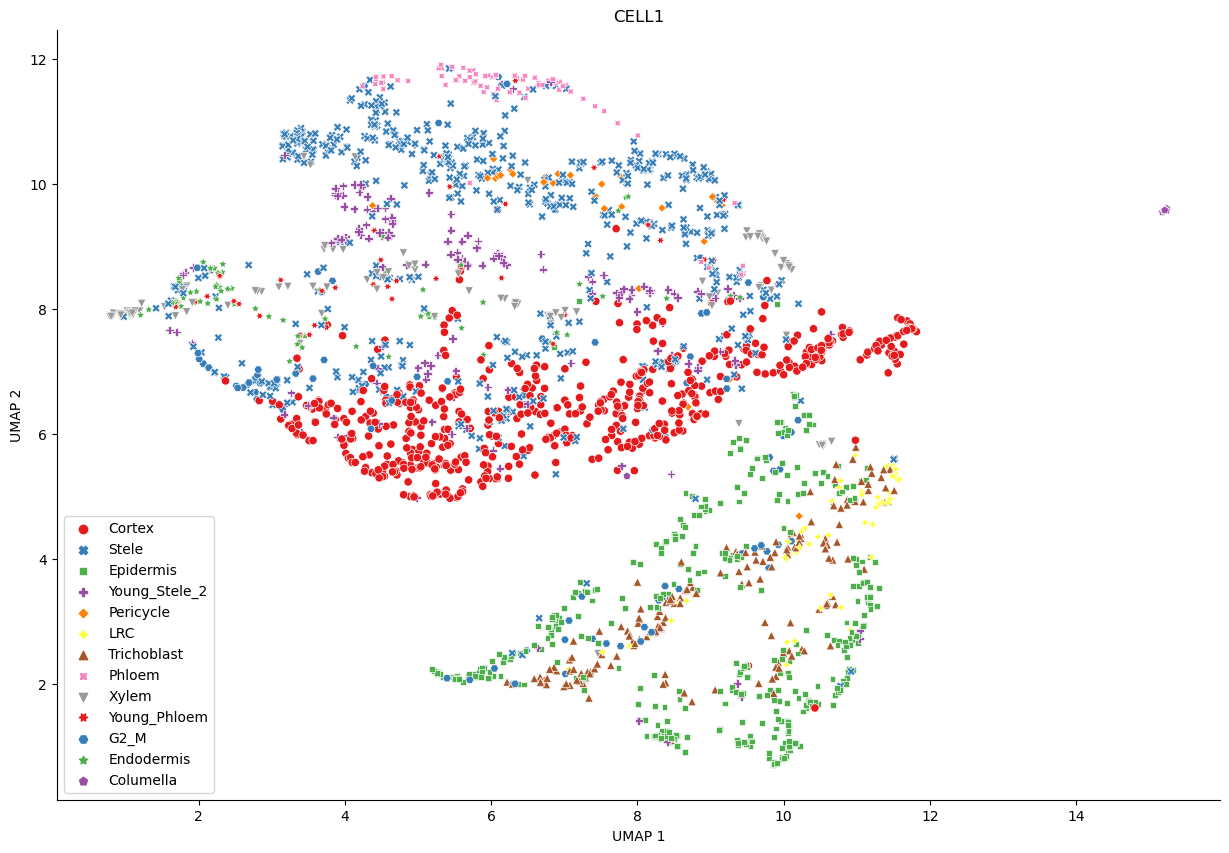

In [38]:
maize_genemods = [mod for mod in full_df.index if mod.startswith('Zm')]

batch = 'Cell1'
just_cells = [cell for cell in full_df.columns if batch in cell] #just batch 1
maize_full_df = full_df.loc[maize_genemods, just_cells]

all_zero_cols = [x for x in maize_full_df.index if sum(maize_full_df.loc[x].values) == 0]
maize_full_df.drop(all_zero_cols, axis = 0, inplace = True) # Drop all zero gene models

maize_full_df.columns = [meta_data.loc[x, 'Annotation'] for x in maize_full_df.columns]


dic_to_combine = {'Cortex_1' : 'Cortex', 
                  'Cortex_2': 'Cortex', 
                  'Cortex_3': 'Cortex',
                  'Cortex_4': 'Cortex',
                  'Stele_1': 'Stele',
                  'Stele_2': 'Stele',
                  'Young_Stele_2': 'Young_Stele_2',
                  'Endodermis': 'Endodermis',
                  'Pericycle': 'Pericycle',
                  'Phloem': 'Phloem',
                  'Young_Phloem': 'Young_Phloem',
                  'Xylem': 'Xylem',
                  'Trichoblast': 'Trichoblast',
                  'G2_M': 'G2_M',
                  'Epidermis_1': 'Epidermis',
                  'Epidermis_2': 'Epidermis',
                  'Epidermis_3': 'Epidermis',
                  'LRC': 'LRC',
                  'Columella': 'Columella'}

comb_type = [dic_to_combine[x] for x in maize_full_df.columns]

fig = plt.figure(figsize = (15,10))
maize_full_df.dropna(axis = 0, how= 'all', inplace = True)
pca = PCA(n_components=100)
embedding1 = pca.fit_transform(maize_full_df.T)
embedding=embedding1[:,0:30]
reducer = umap.UMAP()
embedding2 = reducer.fit_transform(embedding)

ax = fig.add_subplot(111)
sns.scatterplot(x = embedding2[:,0], y = embedding2[:,1], hue = comb_type, legend = True, ax = ax, palette='Set1', style=comb_type)
#ax.legend().set_visible(False)  # This line hides the legend
ax.set_title(batch.upper())
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

In [29]:
pd.DataFrame(embedding)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-363.957096,38.419554,-44.615325,35.723119,42.857177,-1.995109,8.322091,-11.878960,-27.244158,-7.086688,...,-7.088787,21.797564,21.230485,-9.236923,-14.508653,-8.886093,4.352590,-6.083662,-5.591674,-9.028844
1,-134.380659,-99.297121,-63.009486,6.108940,-3.181401,-107.799505,-35.687756,-24.961636,-4.920144,-28.757914,...,7.857979,2.882758,-38.850456,12.765262,25.680619,8.336985,-16.561145,6.433755,19.899688,-0.075233
2,29.701777,-142.803889,72.545894,-55.780569,91.605329,110.431589,113.179384,-51.694651,71.141781,-29.852341,...,28.131747,2.012054,16.093125,-11.572007,-24.655084,12.470402,5.921639,2.044289,11.517453,1.148877
3,32.926591,-114.723170,160.195282,109.669976,12.683662,127.889478,-36.007608,26.972826,-132.616811,-96.160098,...,21.229282,-20.228937,1.712980,26.026439,29.431351,-16.569690,-21.006259,9.390882,23.302439,37.062908
4,-186.505655,107.002610,-116.094313,83.618300,-18.149103,-9.665623,5.043412,-24.771119,7.814730,-4.806292,...,-15.885707,-13.814908,-7.648648,-10.308724,1.327877,12.431097,-1.191907,6.006749,-8.448770,4.599053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,-413.059979,90.798876,-80.816483,63.323095,22.934215,-24.044912,31.338529,3.873379,-2.171392,3.406770,...,-18.254783,-4.492849,-1.348623,-7.441738,-11.788053,5.186903,4.178914,-1.175776,-5.075082,12.031097
2395,46.880162,-152.301875,53.151184,-27.264563,-63.671038,25.869630,3.761414,14.186015,57.618602,-29.077409,...,-30.315808,3.488317,3.806287,13.708120,-20.064477,-18.030772,-20.034153,23.825186,-20.768209,-2.207042
2396,-100.848687,1.975176,244.286700,-62.254867,74.294722,115.939774,83.496827,-2.663097,73.660041,-40.121103,...,49.550827,3.968068,24.447668,-3.494843,12.820723,19.161252,-0.796519,8.266513,-1.350801,8.710375
2397,-366.582151,122.716669,121.577702,17.617208,-17.722708,-20.346707,14.978382,14.280935,6.657526,26.016396,...,-5.363373,-9.252336,18.916702,4.297081,4.378199,6.704854,-2.346764,16.574064,13.984889,-4.650363


In [31]:
pd.DataFrame(pca.components_.T,index=maize_full_df.T.columns).iloc[:,0:30]

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
Zm00001d027230,4.194650e-05,-5.359657e-05,0.000021,-0.000012,-2.324223e-05,-0.000129,0.000119,4.543991e-05,0.000170,0.000007,...,0.000172,-0.000173,-0.000116,0.000042,0.000016,-0.000335,-0.000242,-0.000220,-0.000098,0.000365
Zm00001d027231,9.545744e-04,4.281439e-04,0.000479,0.000459,-1.034675e-03,0.001866,-0.001472,-1.784178e-03,0.001119,0.001112,...,-0.002058,0.000484,-0.001114,0.000755,-0.000797,0.000039,0.000760,-0.002291,-0.003940,0.000786
Zm00001d027236,1.263003e-04,5.798480e-05,0.000078,-0.000046,1.235372e-05,-0.000067,-0.000049,6.462074e-05,-0.000019,0.000170,...,-0.000638,0.000567,-0.000239,0.000629,0.000464,-0.000147,0.000072,-0.000032,0.000464,0.000120
Zm00001d027239,1.587059e-05,1.296192e-05,0.000014,-0.000057,1.777842e-05,-0.000022,0.000010,2.985210e-05,-0.000050,0.000071,...,0.000018,0.000209,-0.000126,0.000298,0.000117,0.000134,0.000135,-0.000010,0.000133,0.000039
Zm00001d027240,6.266298e-05,-8.914657e-06,-0.000096,-0.000191,-1.432862e-05,-0.000069,-0.000073,-2.743125e-05,-0.000230,-0.000193,...,-0.000165,0.000427,-0.000686,-0.001041,0.000082,-0.000160,0.000381,0.000015,-0.000459,-0.000355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zm00001d000444,5.206696e-04,-5.825100e-04,0.000510,-0.000082,2.489060e-04,0.001671,0.001169,6.371549e-04,-0.000363,0.000534,...,0.001280,0.000701,-0.000367,-0.000990,-0.001047,-0.000092,0.001192,-0.000440,0.000884,-0.000411
Zm00001d000447,1.880288e-05,-2.229076e-04,0.000200,-0.000329,-3.070992e-05,-0.000296,0.000002,-1.597938e-04,-0.000106,0.000061,...,0.000957,-0.000207,-0.000512,-0.000195,0.000824,0.000126,0.000317,-0.000432,0.000562,-0.000440
Zm00001d000452,1.495973e-05,4.788628e-06,-0.000017,0.000024,-3.122483e-05,-0.000025,0.000017,-3.033620e-05,0.000066,-0.000131,...,0.000126,-0.000008,-0.000039,0.000068,0.000005,0.000135,-0.000045,0.000039,-0.000024,-0.000092
Zm00001d000458,-9.212252e-07,-2.342146e-06,0.000003,0.000002,5.158322e-06,0.000004,0.000007,7.855869e-07,0.000009,-0.000010,...,-0.000020,0.000012,0.000001,-0.000013,0.000007,0.000013,-0.000004,-0.000033,-0.000034,0.000008


In [42]:
# Get the loadings, scores, and mean
loadings = pca.components_  # Loadings (1x66)
scores = embedding1  # Scores (660x1)
mean = pca.mean_  # Mean (66,)

# Step 2: Predict PC1 scores for each cell
predicted_scores = np.dot(maize_full_df.T - mean, loadings.T)

# Step 3: Calculate residuals
residuals = scores - predicted_scores
pd.DataFrame(residuals)
mean

array([0.01834098, 0.88370154, 0.07503126, ..., 0.0041684 , 0.00125052,
       0.00125052])

In [137]:
seed_value = 42
np.random.seed(seed_value)

embedding_rf=embedding2[:,1]

In [138]:
X_train, X_test,y_train,y_test=train_test_split(embedding, embedding_rf,  test_size=0.2, random_state=42)

In [139]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [140]:
y_pred = rf_model.predict(X_test)

In [141]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.5114036738830737


In [134]:
feature_importances = rf_model.feature_importances_

In [117]:
list(new_column_names.values())

['PC1',
 'PC2',
 'PC3',
 'PC4',
 'PC5',
 'PC6',
 'PC7',
 'PC8',
 'PC9',
 'PC10',
 'PC11',
 'PC12',
 'PC13',
 'PC14',
 'PC15',
 'PC16',
 'PC17',
 'PC18',
 'PC19',
 'PC20',
 'PC21',
 'PC22',
 'PC23',
 'PC24',
 'PC25',
 'PC26',
 'PC27',
 'PC28',
 'PC29',
 'PC30']

In [135]:
feature_importances

array([8.34982482e-01, 1.80262299e-02, 1.52433174e-02, 6.82684285e-02,
       1.90365111e-02, 4.21709151e-03, 1.91498416e-03, 2.40743112e-03,
       1.72030902e-03, 1.09672665e-02, 3.45606567e-03, 1.66601630e-03,
       1.24910614e-03, 9.65878139e-04, 1.78304501e-03, 7.76871581e-04,
       1.39484764e-03, 5.95292663e-04, 5.97697415e-04, 2.93008759e-03,
       6.91183193e-04, 7.60181341e-04, 6.00363794e-04, 8.57194752e-04,
       8.98369520e-04, 7.43571856e-04, 6.53144648e-04, 8.51676671e-04,
       6.73147244e-04, 1.07220712e-03])

Text(0.5, 0, 'PCs')

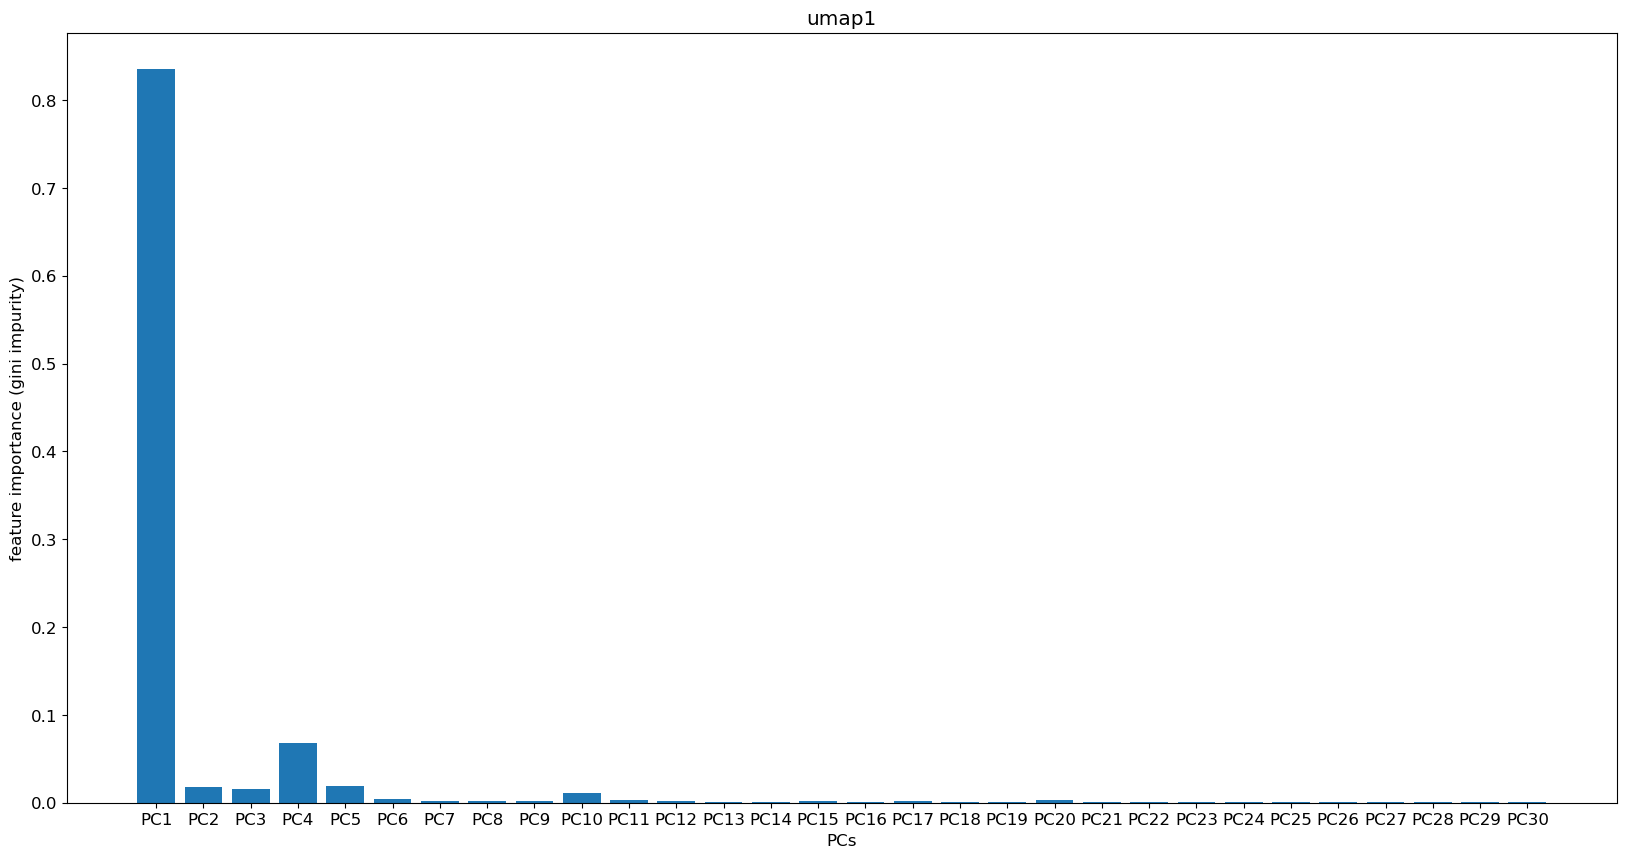

In [136]:
plt.figure(figsize=(20,10))
plt.bar(x=list(new_column_names.values()),height=feature_importances)
plt.title("umap1")
plt.ylabel("feature importance (gini impurity)")
plt.xlabel("PCs")

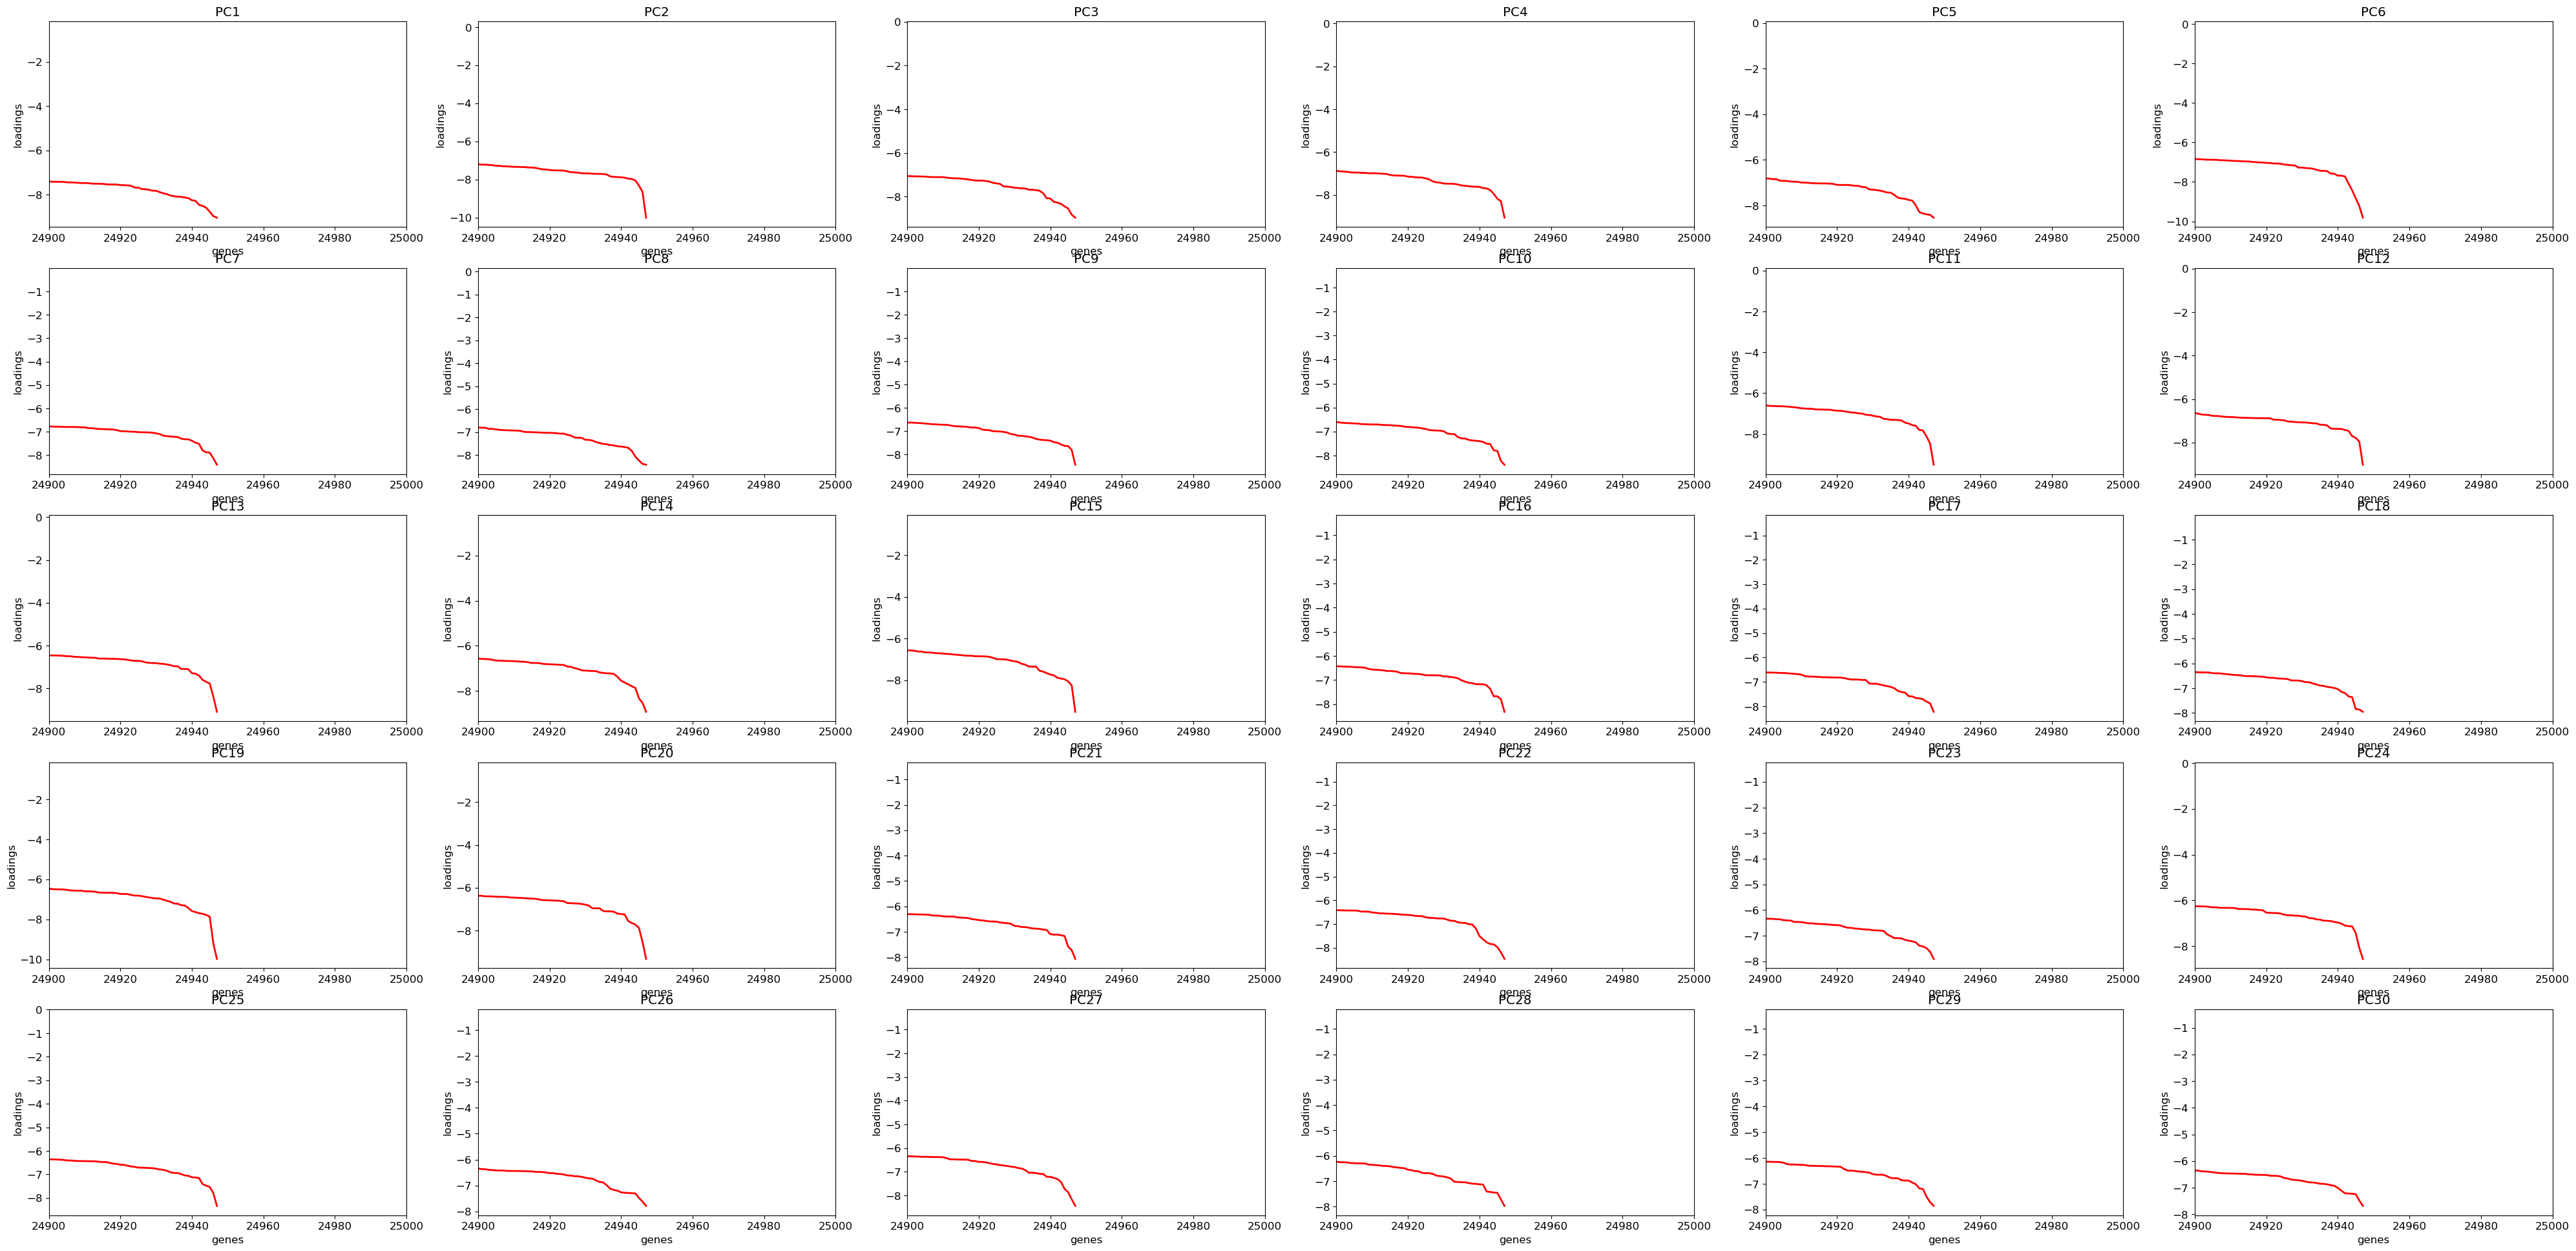

In [90]:
loadings=pd.DataFrame(pca.components_.T,index=maize_full_df.T.columns).iloc[:,0:30]
new_column_names = {old_col: f'PC{index + 1}' for index, old_col in enumerate(loadings.columns)}
loadings = loadings.rename(columns=new_column_names)

toploadings=loadings

numofgenes=100

plt.rcParams.update({'font.size': 12})
fig = plt.figure(figsize=(50,24))
new_column_names
num=1
Top100genes=[]
for i in new_column_names.values():
    myax=fig.add_subplot(5,6,num)
    loadings[str(i)]=np.log10((abs(loadings[str(i)])))
    loadings=loadings.sort_values(str(i), ascending=False)
    top100genes=loadings.head(numofgenes).index.tolist()
    loadings_pcs=toploadings[str(i)].loc[top100genes]
    Top100genes.append(
        {str(i):top100genes,
        str(i)+"loadings":loadings_pcs}
    )
    myax.plot((range(loadings.shape[0])), loadings[str(i)], color='red', lw=2, alpha=1)
    myax.set_ylabel("loadings")
    myax.set_xlabel("genes")
    
    plt.xlim(24900,25000)
    plt.title(str(i))
    if num==30: break
    num+=1
Top100gene = pd.DataFrame.from_dict({(i,j): Top100genes[i][j] 
                                     for i in range(len(Top100genes)) 
                                     for j in Top100genes[i].keys()}, 
                                    orient='index').T

# new_column_names = {old_col: f'PC{index + 1}' for index, old_col in enumerate(Top100gene.columns)}
# Top100gene = Top100gene.rename(columns=new_column_names)
Top100gene.to_csv("Top100genesPc30.csv", index=False)

plt.savefig("allgenes_loadings_150.png")

In [88]:
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
Zm00001d023395,-1.030418,-0.692295,-1.046459,-1.009684,-0.331466,-0.770087,-0.564792,-1.073019,-0.407150,-1.763098,...,0.166177,-1.354666e-02,0.068618,-0.025751,0.007276,-0.051930,0.022592,-5.745700e-02,0.013786,0.020705
Zm00001d023994,-2.184872,-1.924449,-1.289743,-1.212831,-1.294770,-1.120339,-1.921692,-1.748931,-1.497872,-0.985534,...,0.039579,1.000161e-01,0.082927,-0.076333,0.092597,-0.049369,0.083820,-3.107113e-02,-0.040253,-0.000958
Zm00001d013568,-0.850918,-2.267510,-2.635054,-0.945763,-1.027763,-1.282500,-0.571680,-1.361850,-0.540278,-0.659576,...,-0.018450,2.612869e-01,-0.109724,0.128317,0.161872,-0.039268,0.002845,5.164123e-02,-0.089696,-0.040134
Zm00001d043523,-3.025648,-1.680198,-1.683584,-1.025930,-1.996904,-1.327352,-1.862261,-1.526989,-1.149797,-0.914283,...,0.202160,1.074451e-01,0.041424,-0.201479,-0.076289,0.118285,0.002263,-4.046613e-02,-0.127431,0.217978
Zm00001d032822,-2.837954,-1.556350,-1.627187,-1.008476,-0.838030,-2.287578,-1.160966,-2.279694,-0.926309,-0.628087,...,0.031405,-1.447704e-01,0.049900,-0.089707,0.096421,-0.034998,-0.023091,5.272767e-02,0.031615,-0.113230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zm00001d033273,-6.535457,-5.022579,-5.008578,-6.533788,-5.005123,-4.815927,-5.271138,-5.261589,-5.179713,-4.623267,...,-0.000012,-2.126956e-05,-0.000010,-0.000023,-0.000050,0.000005,-0.000004,-1.933137e-08,-0.000085,-0.000028
Zm00001d021972,-4.211055,-4.023069,-4.330775,-4.278699,-3.795647,-3.918555,-4.483687,-3.792166,-3.891736,-4.046804,...,0.000036,-5.409927e-05,0.000286,-0.000003,0.000326,-0.000133,-0.000106,-3.005331e-04,0.000205,-0.000194
Zm00001d026996,-6.089798,-5.601669,-5.788197,-5.379074,-5.139953,-5.352696,-4.910363,-5.026990,-4.962925,-4.567161,...,0.000016,5.365067e-05,0.000022,0.000017,-0.000062,-0.000002,0.000009,3.044812e-05,-0.000072,-0.000018
Zm00001d006291,-6.357772,-5.847077,-5.731453,-5.002956,-5.623096,-5.842416,-5.454049,-5.944968,-4.817612,-5.849157,...,0.000028,-5.621370e-07,-0.000013,0.000026,-0.000058,0.000016,-0.000007,-1.967070e-05,0.000007,-0.000007


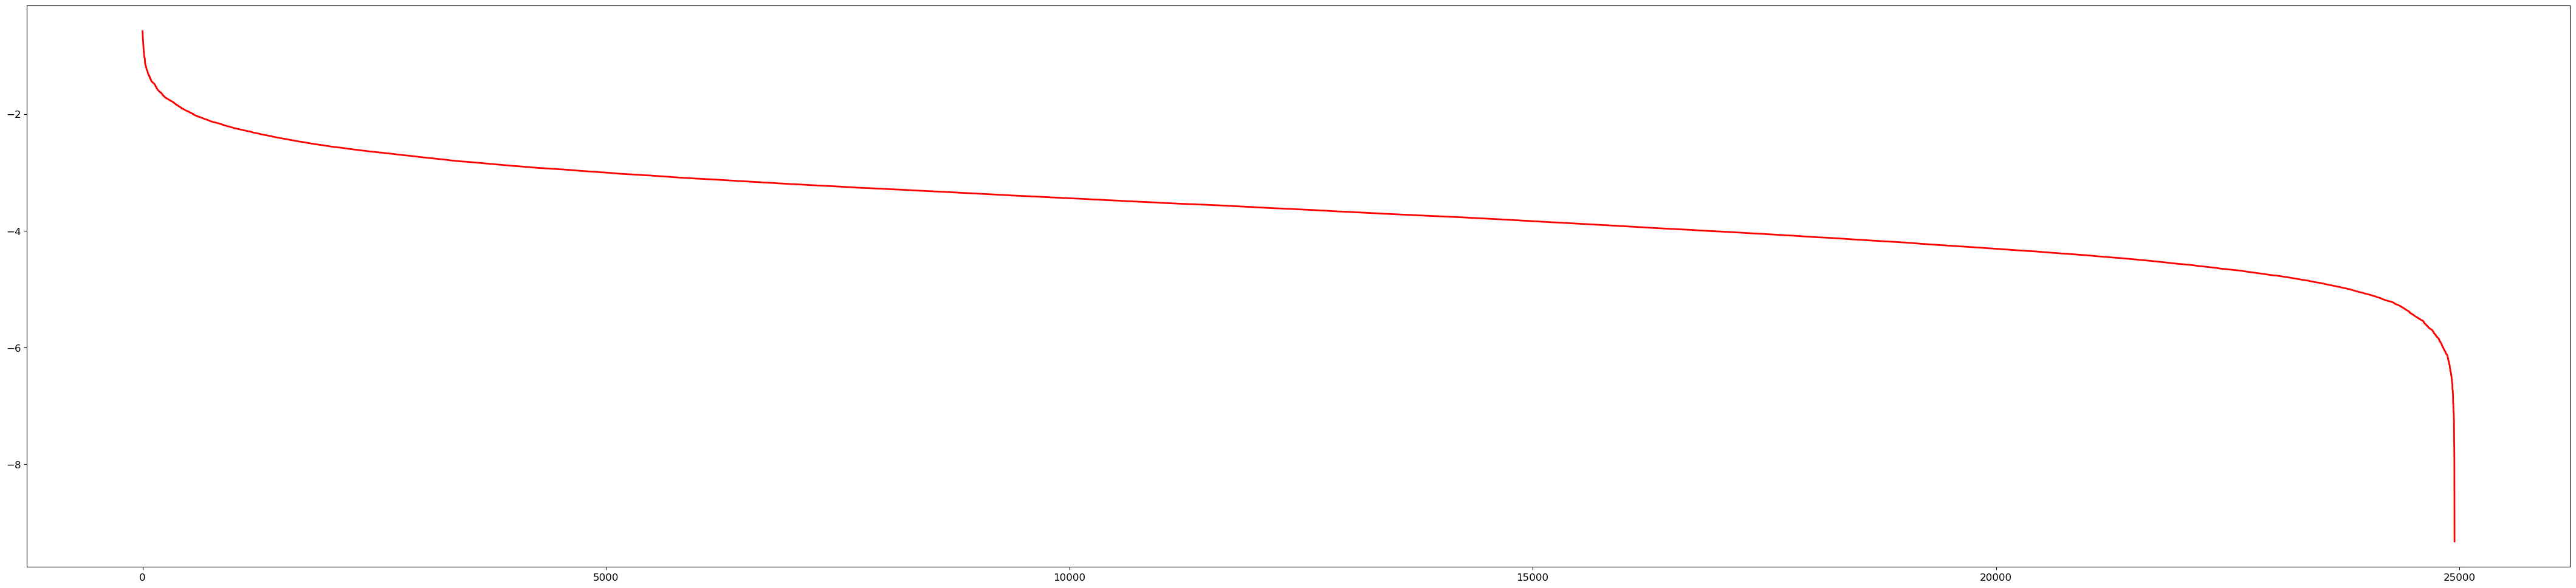

In [76]:
fig=plt.figure(figsize=(54,12))
plt.plot((range(loadings.shape[0])), loadings[str(i)], color='red', lw=2, alpha=1)

In [82]:
out_sum=np.cumsum(pca.explained_variance_ratio_)

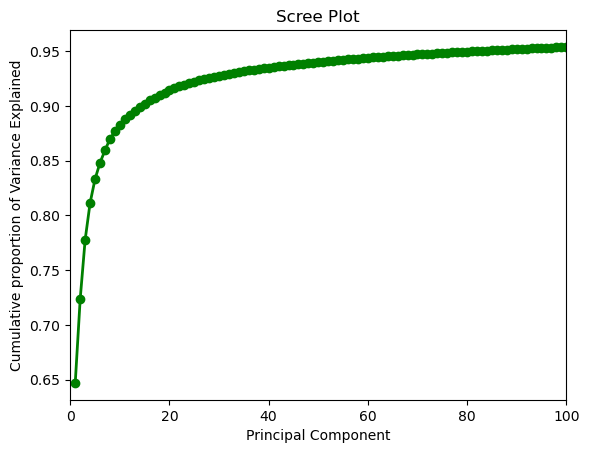

In [101]:
plt.plot(pc_values, out_sum, 'go-', linewidth=2)
plt.xlim(0,100)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative proportion of Variance Explained')
plt.savefig("screeplot.png")

In [11]:
def min_max_normalize(data):
    min_val = np.min(data)
    max_val = np.max(data)
    #normalized_data = (data - min_val) / (max_val - min_val)
    normalized_data = [(x - min_val)/(max_val-min_val) for x in data]
    return pd.Series(normalized_data)


### Two tests: 1.Mean then normalize  2.Normalize then mean. ###
maize_full_df.columns = comb_type
maize_full_MeanNorm = maize_full_df.copy()
maize_full_MeanNorm = maize_full_MeanNorm.groupby(maize_full_MeanNorm.columns, axis=1).mean()
cols_MeanNorm = maize_full_MeanNorm.columns
maize_full_MeanNorm = maize_full_MeanNorm.apply(min_max_normalize, axis=1)
maize_full_MeanNorm.columns = cols_MeanNorm
maize_full_MeanNorm.to_csv(f"expression_{batch}_noProcess_{ts}.csv")
pd.Series(maize_full_MeanNorm.columns).to_csv(f'maize_celltypes_CELL_{ts}.csv')

maize_full_NormMean = maize_full_df.copy()
cols_NormMean = maize_full_NormMean.columns
maize_full_NormMean = maize_full_NormMean.apply(min_max_normalize, axis=1)
maize_full_NormMean.columns = cols_NormMean
maize_full_NormMean = maize_full_NormMean.groupby(maize_full_NormMean.columns, axis=1).mean()



fig = plt.figure(figsize = (18,6))

for i in range(10):
    
    ax = fig.add_subplot(2,5,i+1)
    gene_mod = maize_full_MeanNorm.iloc[i]
    sns.boxplot(gene_mod, orient = 'h', ax = ax)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.set_title(gene_mod.name)

fig.suptitle('Mean-Normalization Cells')      
fig.tight_layout()        



fig = plt.figure(figsize = (18,6))

for i in range(10):
    
    ax = fig.add_subplot(2,5,i+1)
  
    gene_mod = maize_full_NormMean.iloc[i]
    sns.boxplot(gene_mod, orient = 'h', ax = ax)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    ax.set_title(gene_mod.name)        

fig.suptitle('Normalization-Mean Cells')    
fig.tight_layout()

NameError: name 'comb_type' is not defined

In [ ]:
# Filter datasets by looking at meta data and determining cut offs
meta_data_cols = ['nCount_RNA', 'nFeature_RNA', 'nCount_SCT', 'nFeature_SCT']

maize_cells = [cell for cell in meta_data.index if cell.startswith('Maize') and 'Cell' in cell]
maize_mods = [mod for mod in raw_expression_data.index if mod.startswith('Zm')]

fig = plt.figure(figsize = (10, 10))
for i, feature in enumerate(meta_data_cols):
    i+=1
    ax = fig.add_subplot(2,2,i)
    feature = meta_data.loc[maize_cells,feature]
    ax.hist(feature)
    ax.set_title(feature.name)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
  
fig.tight_layout()

# Filter based off feature in the meta data
nCount_cutoff = 15000
nfeature_cutoff = 3000

nCount_cutoff_cells = [x for x in meta_data.index if meta_data.loc[x,'nCount_SCT'] > nCount_cutoff and x.startswith('Maize')]
nfeature_cutoff_cells = [x for x in nCount_cutoff_cells if meta_data.loc[x, 'nFeature_SCT'] > nfeature_cutoff and x.startswith('Maize')]

raw_expression_data_filter = raw_expression_data.loc[maize_mods, nfeature_cutoff_cells]


# filter based off the statistics of the gene models
# Should I filter based off low std when compared to the mean or just std. Question for James.
stats_models = raw_expression_data_filter.T.describe()

ax = plt.figure(figsize = (10,10))
fig.add_subplot(111)
stats_models.T.hist(ax = ax, grid = False, bins = 20)
fig.tight_layout()

gene_mods_zero = [x for x in stats_models.columns if stats_models.loc['max', x] == 0] # These will probably be the same as below or roughly
gene_mods_lowSTD = [x for x in stats_models.columns if stats_models.loc['std', x] < 0.08]

mods_to_drop = list(set(gene_mods_lowSTD + gene_mods_zero))

raw_expression_data_filter.drop(mods_to_drop, axis = 0, inplace = True)

# Divide datasets into nucleus/cell and batch
data_source = 'Cell' # Other options: Nucl

fig = plt.figure(figsize=(25, 8))

dic_to_combine = {'Cortex_1' : 'Cortex', 
                  'Cortex_2': 'Cortex', 
                  'Cortex_3': 'Cortex',
                  'Cortex_4': 'Cortex',
                  'Stele_1': 'Stele',
                  'Stele_2': 'Stele',
                  'Young_Stele_2': 'Stele',
                  'Endodermis': 'Endodermis',
                  'Pericycle': 'Pericycle',
                  'Phloem': 'Phloem',
                  'Young_Phloem': 'Phloem',
                  'Xylem': 'Xylem',
                  'Trichoblast': 'Trichoblast',
                  'G2_M': 'G2_M',
                  'Epidermis_1': 'Epidermis',
                  'Epidermis_2': 'Epidermis',
                  'Epidermis_3': 'Epidermis',
                  'LRC': 'LRC',
                  'Columella': 'Columella'}

for batch in [1,2,3]:
    print(batch)
    Batch = batch

    cols = [col for col in raw_expression_data_filter.columns if f'{data_source}{Batch}' in col]
    
    subset_data = raw_expression_data_filter.loc[:, cols]
    
    cols_to_annot = [dic_to_combine[meta_data.loc[x,'Annotation']] for x in subset_data.columns]
    
    subset_data_transpose = subset_data.T
    stats_models_subset = subset_data_transpose.describe()
    stats_models_subset.T.hist(figsize=(10, 10), grid = False, bins = 20)
    mods_to_drop_subset = [x for x in stats_models_subset.columns if stats_models_subset.loc['std', x] < 0.08]
    
    subset_data_transpose.drop(mods_to_drop_subset, axis = 1, inplace = True)
    
    pca = PCA(n_components=100)
    embedding = pca.fit_transform(subset_data_transpose)
    
    reducer = umap.UMAP()
    embedding2 = reducer.fit_transform(embedding)
    
    ax = fig.add_subplot(1,3,batch)
    sns.scatterplot(x = embedding2[:,0], y = embedding2[:,1], hue = cols_to_annot, legend = True, ax = ax, palette='Set1', style=cols_to_annot)
    ax.legend().set_visible(False)  # This line hides the legend
    ax.set_title(f'{data_source}{Batch}')
    ax.set_xlabel('UMAP 1')
    ax.set_ylabel('UMAP 2')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    subset_data_transpose.T.to_csv(f'expression_batch{batch}_processed_featureFiltered_nCountSCT{nCount_cutoff}_nFeatureSCT{nfeature_cutoff}_{ts}.csv')
    
ax.legend(loc = 'center left', bbox_to_anchor=(1,0.5), title = 'Cell Type', frameon = False)
fig.tight_layout()
